In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
import tree
import os

import began
from pathlib import Path
import xarray as xa
import numpy as np
from began import apply_per_image_standardization
from xhistogram.xarray import histogram
import seaborn as sns

import began
from began import rotate, flip
from began import Encoder, Decoder, VQVAEModel, ResidualStack
from began import make_square_mask, make_flat_bins, apply_nmt_flat
import pymaster as nmt

%load_ext autoreload
%autoreload 2

In [2]:
xtick_labels = began.xarray.get_predefined_bin_labels()

NameError: name 'df' is not defined

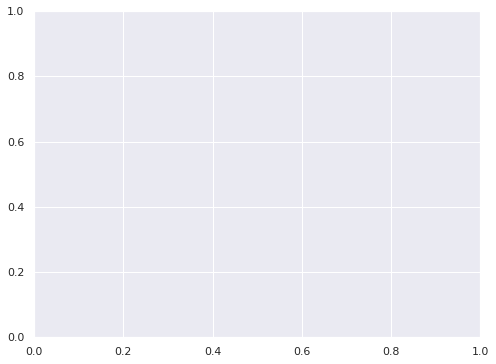

In [3]:
sns.set()
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
pal = sns.cubehelix_palette(2, rot=-0.5, dark=.7)

g = sns.violinplot(x="bandpowers", y="log_data",
               split=True, inner="quart",
               palette=pal,
               hue='direc',
               data=df[df['field'] == 'tt'],
              ax=ax)
#sns.despine(left=True)
g.set_ylabel(r"$\log[C_{\ell_b}^{\rm TT}]$")
g.set_xlabel(r"$\ell_b$")
g.set_xticklabels(labels=xtick_labels, rotation=45)
fig.savefig("example-seaborn.pdf")


In [ ]:
PLOT_DIR = Path('/home/bthorne/projects/gan/began/reports/figures/slides/temp/test')

model = tf.saved_model.load("/oasis/scratch/comet/bthorne/temp_project/began_scratch/mhd/mhd_temp/vqvae-saved")

data_dir = Path("/oasis/scratch/comet/bthorne/temp_project/began_scratch/mhd/data")
test_fpath = data_dir / "mhd_ntest-0300.cdf"
test_xr = xa.open_dataarray(test_fpath).sel(pol=['t'])

data_dir = Path("/oasis/scratch/comet/bthorne/temp_project/began_scratch/mhd/data")
test_fpath = data_dir / "mhd_cl_ntest-0300.cdf"
test_xr_cl = xa.open_dataarray(test_fpath).sel(field=['tt'])

In [ ]:
display(test_xr)
display(test_xr_cl)

In [ ]:
a = model.inference(test_xr.transpose('batch', ..., 'pol').values.astype(np.float32))

In [ ]:
reco_xr = test_xr.copy(deep=True, data=a['x_recon'])
resi_xr = reco_xr.copy(deep=True, data=(test_xr - reco_xr).values)

In [ ]:
reco_xr.name = 'Reconstruction'
resi_xr.name = 'Residuals'

In [ ]:
reco_xr_cl = apply_nmt_flat(reco_xr)
reco_xr_cl.name = 'data'
resi_xr_cl = apply_nmt_flat(resi_xr)
resi_xr_cl.name = 'data'

In [ ]:
sns.set()
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
pal = sns.cubehelix_palette(2, rot=-0.5, dark=.7)

g = sns.violinplot(x="bandpowers", y="log_data",
               split=True, inner="quart",
               palette=pal,
               hue='direc',
               data=df[df['field'] == 'tt'],
              ax=ax)
sns.despine(left=True)
g.set_ylabel(r"$\log[C_{\ell_b}^{\rm TT}]$")
g.set_xlabel(r"$\ell_b$")
g.set_xticklabels(labels=xtick_labels, rotation=45)
fig.savefig("example-seaborn.pdf")

In [ ]:
reco_df = reco_xr_cl.to_dataframe()
resi_df = resi_xr_cl.to_dataframe()

In [ ]:
reco_df.reset_index(level=['field', 'bandpowers'], inplace=True)
resi_df.reset_index(level=['field', 'bandpowers'], inplace=True)

In [ ]:
reco_df

In [ ]:
merged = reco_df.join(resi_df)

In [ ]:
merged

In [ ]:
reco_df